In [43]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5




In [44]:
# подключимся к MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
# запросим статус и параметры подключения
print(mt5.terminal_info())
# получим информацию о версии MetaTrader 5
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2840, maxbars=100000, codepage=1251, ping_last=33118, community_balance=0.0, retransmission=0.5877624836732643, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Russian', path='C:\\Program Files\\MetaTrader 5', ...)
(500, 2840, '19 Mar 2021')


(1590134400, 194., 194.35, 192.21, 193.4, 23633, 0, 1720589)
(1590148800, 193.4, 195.76, 193.01, 195.21, 20720, 1, 1527184)
(1590163200, 195.25, 195.31, 194.2, 194.35, 12577, 0, 993852)
(1590393600, 195.1, 196.34, 195.1, 196.18, 9463, 0, 569442)
(1590408000, 196.18, 197., 195.85, 196.76, 12852, 1, 706358)
(1590422400, 196.76, 197.55, 196.49, 197.55, 10855, 0, 730728)
(1590480000, 198.95, 202.3, 198.52, 201.22, 33318, 0, 2598770)
(1590494400, 201.22, 201.48, 199.01, 199.98, 27180, 1, 2054273)
(1590508800, 199.96, 200.23, 196.3, 196.86, 27027, 0, 1964835)
(1590566400, 196.05, 197.75, 194.71, 196.38, 24049, 0, 1747289)
           time    open    high     low   close  tick_volume  spread  \
0    1590134400  194.00  194.35  192.21  193.40        23633       0   
1    1590148800  193.40  195.76  193.01  195.21        20720       1   
2    1590163200  195.25  195.31  194.20  194.35        12577       0   
3    1590393600  195.10  196.34  195.10  196.18         9463       0   
4    1590408000 

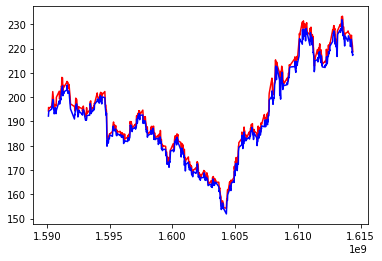

In [45]:
import pytz
# попробуем включить показ символа EURJPY в MarketWatch
selected=mt5.symbol_select("GAZP",True)
if not selected:
    print("Failed to select GAZP")

# установим таймзону в UTC
timezone = pytz.timezone("Etc/UTC")
utc_from = datetime(2021, 3, 1, tzinfo=timezone)

gazp_rates = mt5.copy_rates_from("GAZP", mt5.TIMEFRAME_H4, utc_from, 1000)
for val in gazp_rates[:10]: print(val)
#PLOT
# создадим из полученных данных DataFrame
rate_frame = pd.DataFrame(gazp_rates)
print(rate_frame)
# сделаем отрисовку тиков на графике
plt.plot(rate_frame['time'], rate_frame['high'], 'r-', label='high')
plt.plot(rate_frame['time'], rate_frame['low'], 'b-', label='low')



ValueError: not enough values to unpack (expected 5, got 4)

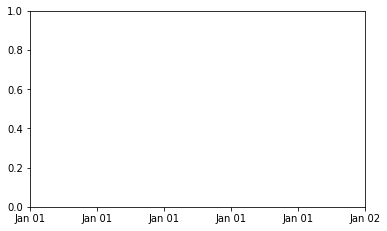

In [47]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import  DateFormatter, WeekdayLocator, HourLocator, DayLocator

alldays    = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
Prices = rate_frame[['time', 'open', 'close', 'high', 'low']].copy()
candlestick_ohlc(ax, Prices, width=0.6)